In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as mpl

In [4]:
import matplotlib
%matplotlib inline

In [3]:
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [5]:
help(np.exp)

Help on ufunc object:

exp = class ufunc(__builtin__.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use np.info().  For
 |  example, np.info(np.sin).  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the "ufuncs.rst"
 |  file in the NumPy reference guide.
 |  
 |  Unary ufuncs:
 |  =============
 |  
 |  op(X, out=None)
 |  Apply op to X elementwise
 |  
 |  Parameters
 |  ----------
 |  X : array_like
 |      Input array.
 |  out : array_like
 |      An array to store the output. Must be the same shape as `X`.
 |  
 |  Returns
 |  -------
 |  r : array_like
 |      `r` will have the same shape as `X`; if out is provided, `r`
 |      will be equal to out.
 |  
 |  Binary ufuncs:
 |  ==============
 |  
 |  op(X, Y,

In [6]:
np.exp(0)

1.0

In [8]:
np.exp(np.array([8,4,6]))

array([ 2980.95798704,    54.59815003,   403.42879349])

In [9]:
np.exp((1,2,5))

array([   2.71828183,    7.3890561 ,  148.4131591 ])

In [10]:
type(np.exp((1,2,5)))

numpy.ndarray

In [12]:
type((1,2,5))

tuple

In [13]:
help((1,2,5))

Help on tuple object:

class tuple(object)
 |  tuple() -> empty tuple
 |  tuple(iterable) -> tuple initialized from iterable's items
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(...)
 |      x.__add__(y) <==> x+y
 |  
 |  __contains__(...)
 |      x.__contains__(y) <==> y in x
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __getnewargs__(...)
 |  
 |  __getslice__(...)
 |      x.__getslice__(i, j) <==> x[i:j]
 |      
 |      Use of negative indices is not supported.
 |  
 |  __gt__(...)
 |      x.__gt__(y) <==> x>y
 |  
 |  __hash__(...)
 |      x.__hash__() <==> hash(x)
 |  
 |  __iter__(...)
 |      x.__iter__() <==> iter(x)
 |  
 |  __le__(...)
 |      x.__le__(y) <==> x<=y
 |  
 |  __len__(...)
 |      x._

In [14]:
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)

In [15]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [16]:
x.shape

(100,)

In [17]:
y.shape

(100,)

In [18]:
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

In [19]:
help(np.random.normal)

Help on built-in function normal:

normal(...)
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float
        Mean ("centre") of the distribution.
    scale : float
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are

In [20]:
np.random.normal(size = (5,5))

array([[ 0.52135929, -0.24955747, -0.577313  , -0.44327904, -1.11952743],
       [ 0.65338303,  1.50383604,  0.81402283, -1.502517  ,  1.54080972],
       [-0.16998971, -0.06135246,  0.10330802,  1.18121107,  2.22683451],
       [ 1.85740021, -0.7107288 , -1.07468577,  0.75390485,  1.03778439],
       [-2.20702197,  0.1366663 ,  0.7484547 , -0.51930919, -0.44582341]])

In [22]:
np.random.normal(size = (5,5)).shape

(5, 5)

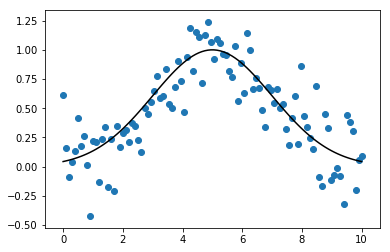

In [23]:
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
fig.savefig('model_and_noise.png')

In [24]:
help(fig.add_subplot)

Help on method add_subplot in module matplotlib.figure:

add_subplot(self, *args, **kwargs) method of matplotlib.figure.Figure instance
    Add a subplot.  Examples::
    
        fig.add_subplot(111)
    
        # equivalent but more general
        fig.add_subplot(1,1,1)
    
        # add subplot with red background
        fig.add_subplot(212, facecolor='r')
    
        # add a polar subplot
        fig.add_subplot(111, projection='polar')
    
        # add Subplot instance sub
        fig.add_subplot(sub)
    
    *kwargs* are legal :class:`~matplotlib.axes.Axes` kwargs plus
    *projection*, which chooses a projection type for the axes.
    (For backward compatibility, *polar=True* may also be
    provided, which is equivalent to *projection='polar'*). Valid
    values for *projection* are: [u'aitoff', u'hammer', u'lambert', u'mollweide', u'polar', u'rectilinear'].  Some of
    these projections
    support additional *kwargs*, which may be provided to
    :meth:`add_axes`.
  

In [25]:
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

In [26]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        c

In [30]:
print "optimized parameters=", popt
print pcov

optimized parameters= [ 0.98068981  5.11908131 -1.8874085 ]
[[  2.03399359e-03  -4.48125224e-06   2.64024022e-03]
 [ -4.48125224e-06   1.00236218e-02  -2.03028885e-05]
 [  2.64024022e-03  -2.03028885e-05   1.01876820e-02]]


In [41]:
ymodel = func(x, popt[0], popt[1], popt[2])

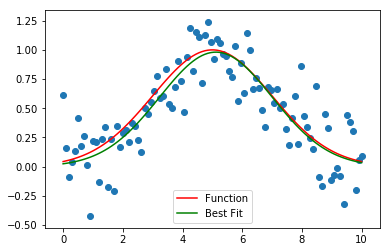

In [42]:
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function', color='r')
ax.plot(x, ymodel, c='k', label='Best Fit', color='g')
ax.scatter(x, yn)
fig.savefig('model_and_noise.png')
ax.legend(loc='lower center')